In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


# check statistics of data

In [3]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# checking for null value:no null values

In [5]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [6]:
df_cont = df.drop(['rank','discipline','sex'],axis=1)

In [7]:
df_cont

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


# data visualisation

In [8]:
df_cont

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


<AxesSubplot:>

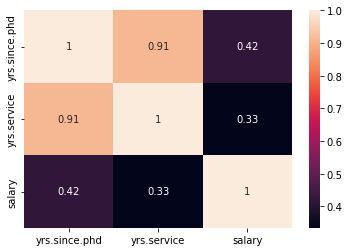

In [9]:
# There is multicolinearity between years since phd and years since service

sns.heatmap(df_cont.corr(),annot=True)

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


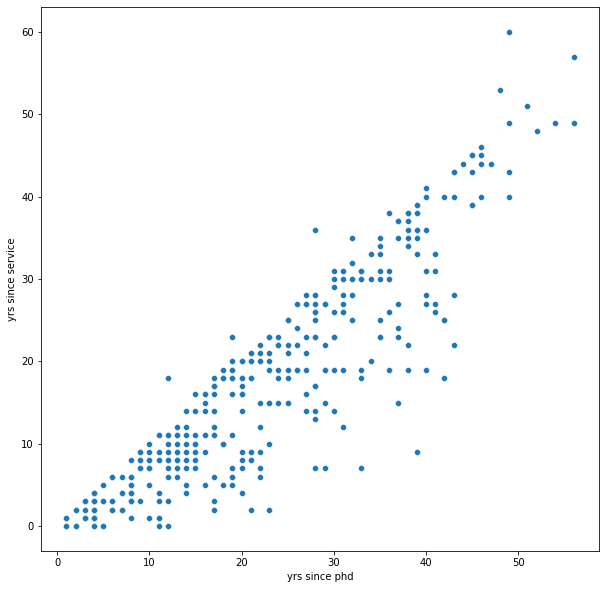

In [10]:
#proving further multicolinearity lets do a scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(df_cont['yrs.since.phd'],df_cont['yrs.service'])
plt.xlabel('yrs since phd')
plt.ylabel('yrs since service')
plt.show()



C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


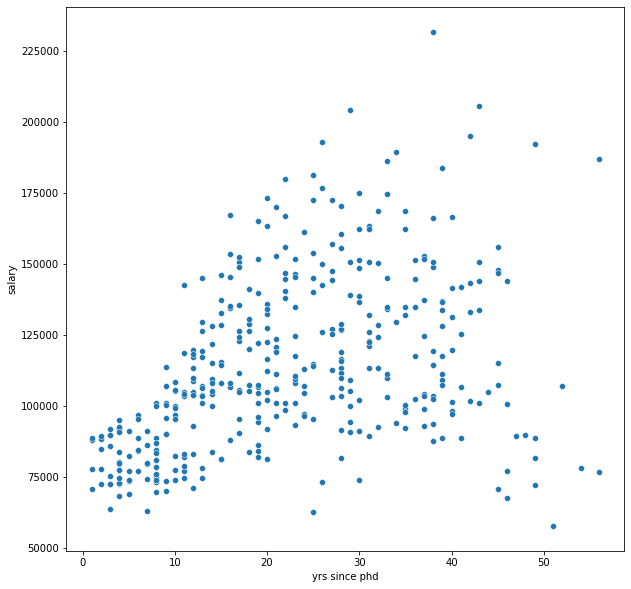

In [11]:
#proving correlation between features and target
plt.figure(figsize=(10,10))
sns.scatterplot(df_cont['yrs.since.phd'],df_cont['salary'])
plt.xlabel('yrs since phd')
plt.ylabel('salary')
plt.show()



C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


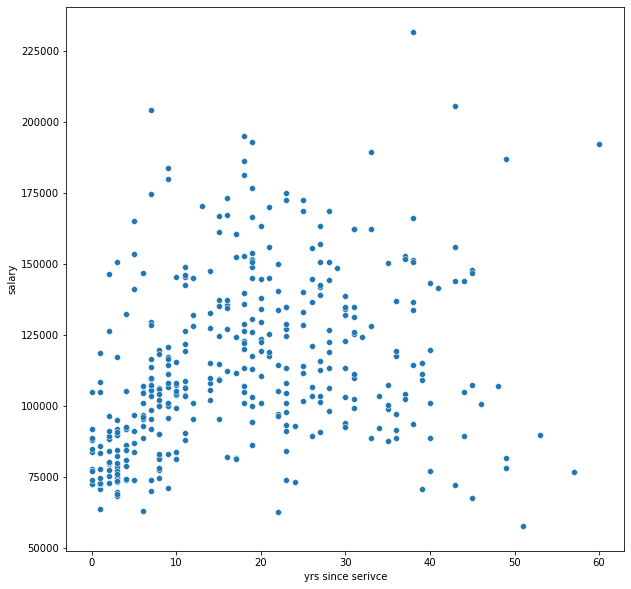

In [12]:
#proving correlation between features and target
plt.figure(figsize=(10,10))
sns.scatterplot(df_cont['yrs.service'],df_cont['salary'])
plt.xlabel('yrs since serivce')
plt.ylabel('salary')
plt.show()



In [13]:
# drop one of the features with multicolinearity

df = df.drop(['yrs.service'],axis=1)
df

,rank,discipline,yrs.since.phd,sex,salary
0,Prof,B,19,Male,139750
1,Prof,B,20,Male,173200
2,AsstProf,B,4,Male,79750
3,Prof,B,45,Male,115000
4,Prof,B,40,Male,141500
...,...,...,...,...,...
392,Prof,A,33,Male,103106
393,Prof,A,31,Male,150564
394,Prof,A,42,Male,101738
395,Prof,A,25,Male,95329


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
df['rank'] = le.fit_transform(df['rank'])
df['sex'] = le.fit_transform(df['sex'])
df['discipline'] = le.fit_transform(df['discipline'])

In [16]:
df

,rank,discipline,yrs.since.phd,sex,salary
0,2,1,19,1,139750
1,2,1,20,1,173200
2,1,1,4,1,79750
3,2,1,45,1,115000
4,2,1,40,1,141500
...,...,...,...,...,...
392,2,0,33,1,103106
393,2,0,31,1,150564
394,2,0,42,1,101738
395,2,0,25,1,95329


C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

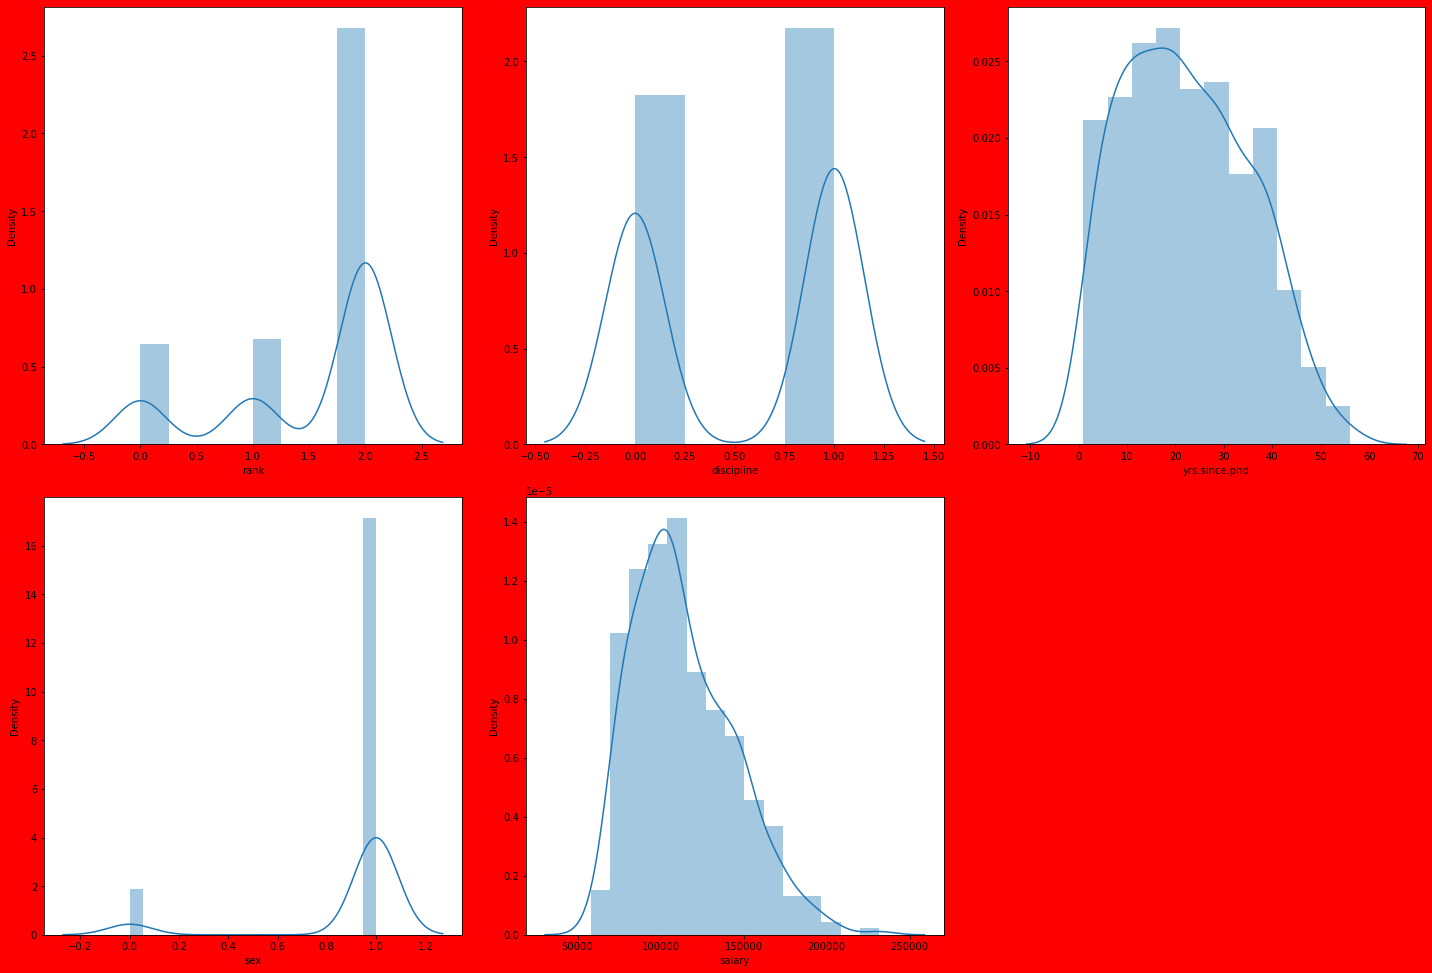

In [17]:
plt.figure(figsize=(20,20),facecolor='red')

plotnumber = 1

for column in df:
    if plotnumber<=6:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.tight_layout()    
        

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


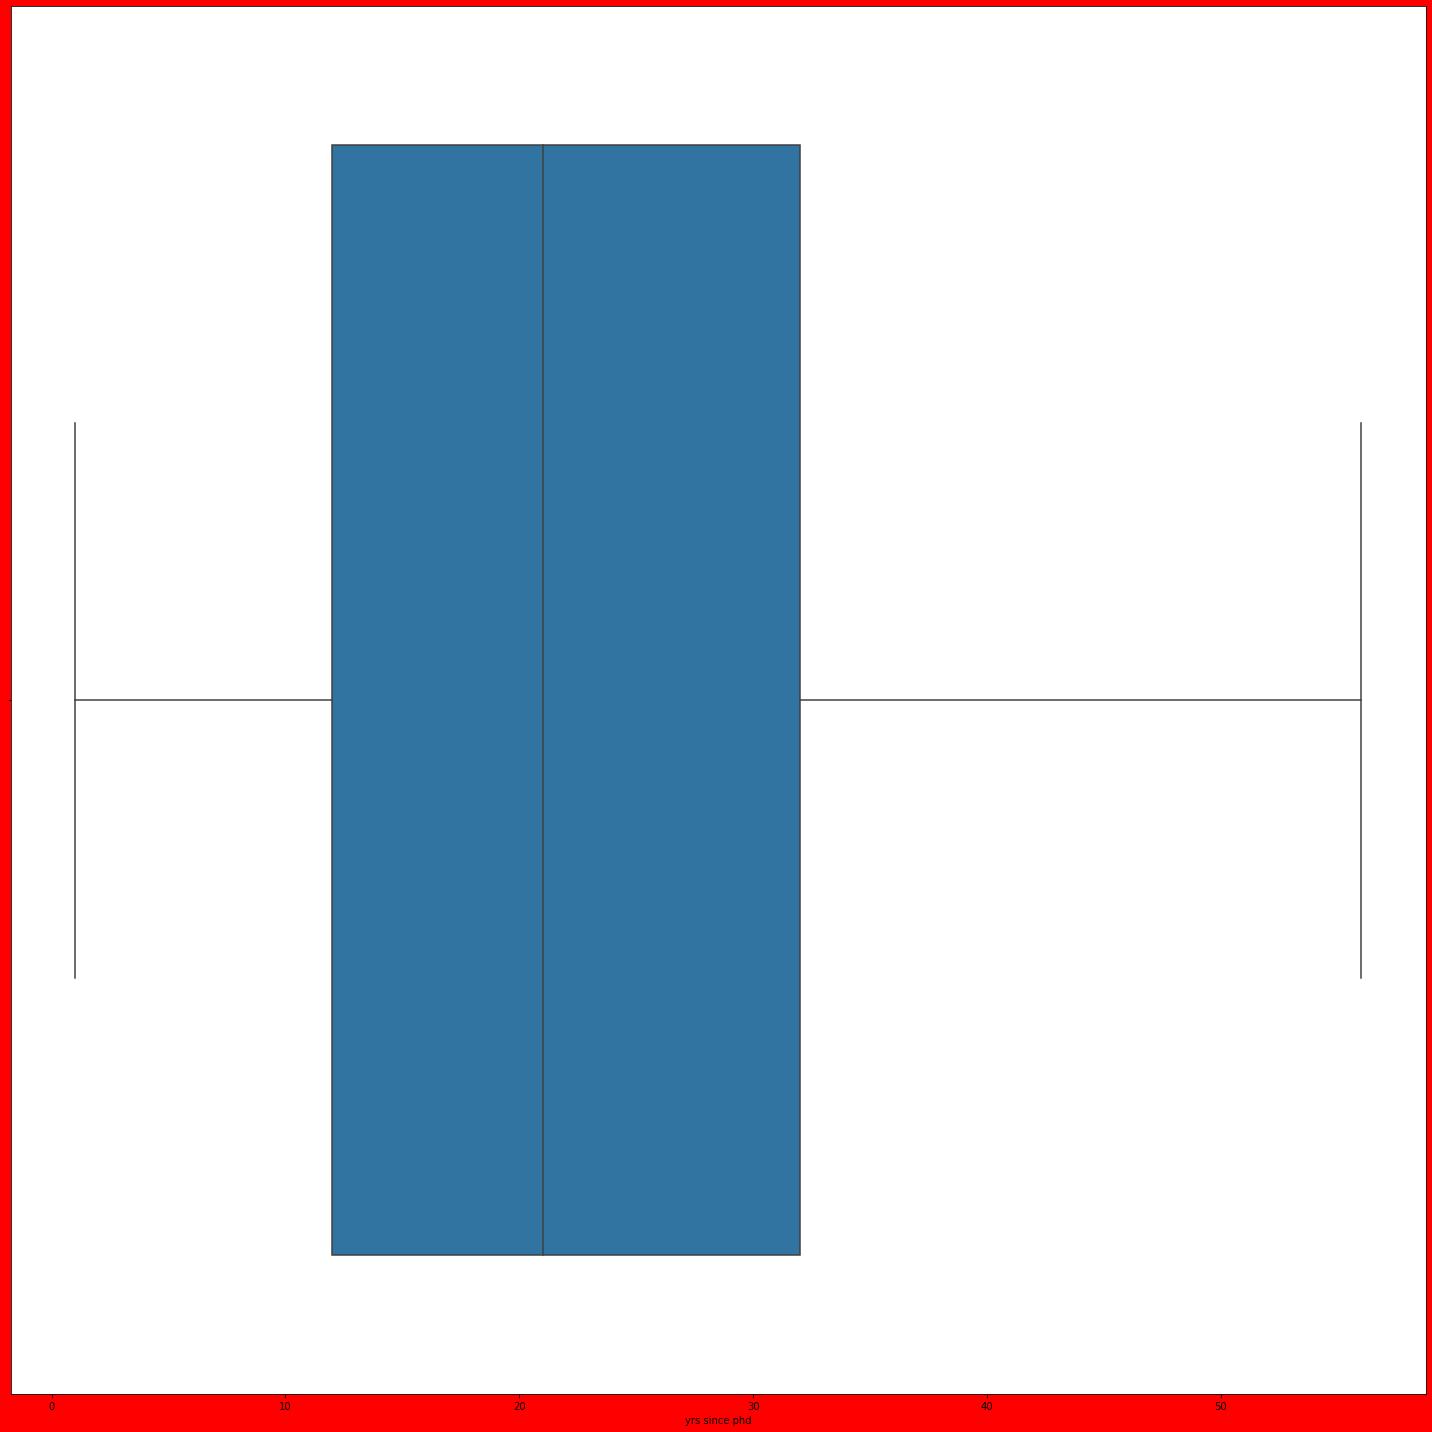

In [18]:
plt.figure(figsize=(20,20),facecolor='red')
sns.boxplot(df['yrs.since.phd'])
plt.xlabel('yrs since phd')
plt.tight_layout()    
        

In [19]:
df.head()

,rank,discipline,yrs.since.phd,sex,salary
0,2,1,19,1,139750
1,2,1,20,1,173200
2,1,1,4,1,79750
3,2,1,45,1,115000
4,2,1,40,1,141500


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [21]:
df.head()

,rank,discipline,yrs.since.phd,sex,salary
0,2,1,19,1,139750
1,2,1,20,1,173200
2,1,1,4,1,79750
3,2,1,45,1,115000
4,2,1,40,1,141500


In [22]:
X = df.drop(columns=['salary','sex'],axis=1)

In [23]:
y = df['salary']

In [24]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [25]:
X

,rank,discipline,yrs.since.phd
0,2,1,19
1,2,1,20
2,1,1,4
3,2,1,45
4,2,1,40
...,...,...,...
392,2,0,33
393,2,0,31
394,2,0,42
395,2,0,25


In [26]:
sc = StandardScaler()
x_scaled = sc.fit_transform(X)

In [27]:
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor

In [28]:
model = KNeighborsRegressor()

In [29]:
from sklearn.model_selection import RepeatedKFold,cross_val_score
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [30]:
model.get_params

<bound method BaseEstimator.get_params of KNeighborsRegressor()>

In [31]:
xgb = XGBRFRegressor()

In [37]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    xgb.fit(x_train,y_train)
    pred_train = xgb.predict(x_train)
    pred_test = xgb.predict(x_test)
    print(f"At random state of {i}, the training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At random state of {i}, the testing accuracy is: {r2_score(y_test,pred_test)}")
    print("\n")


    

At random state of 0, the training accuracy is: 0.5546624337566255
At random state of 0, the testing accuracy is: 0.4354670825862429


At random state of 1, the training accuracy is: 0.551468186587857
At random state of 1, the testing accuracy is: 0.48780207708799683


At random state of 2, the training accuracy is: 0.5648256962179308
At random state of 2, the testing accuracy is: 0.40409660194447317


At random state of 3, the training accuracy is: 0.5564789880723817
At random state of 3, the testing accuracy is: 0.3976793184297984


At random state of 4, the training accuracy is: 0.5754127612473263
At random state of 4, the testing accuracy is: 0.33379452578124935


At random state of 5, the training accuracy is: 0.5532554864758032
At random state of 5, the testing accuracy is: 0.3700985698349717


At random state of 6, the training accuracy is: 0.5488097003812622
At random state of 6, the testing accuracy is: 0.503492422204239


At random state of 7, the training accuracy is: 0.5633

At random state of 59, the testing accuracy is: 0.43990500532865673


At random state of 60, the training accuracy is: 0.547825176617064
At random state of 60, the testing accuracy is: 0.5182107102113841


At random state of 61, the training accuracy is: 0.5378938630223368
At random state of 61, the testing accuracy is: 0.541473775482062


At random state of 62, the training accuracy is: 0.5653858034844776
At random state of 62, the testing accuracy is: 0.2983042250817184


At random state of 63, the training accuracy is: 0.5181961808079262
At random state of 63, the testing accuracy is: 0.5864998229304422


At random state of 64, the training accuracy is: 0.5538440499470338
At random state of 64, the testing accuracy is: 0.37513480555412004


At random state of 65, the training accuracy is: 0.5878639498261762
At random state of 65, the testing accuracy is: 0.2474819850636435


At random state of 66, the training accuracy is: 0.5324635614319146
At random state of 66, the testing accura

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=63)
from sklearn.model_selection import cross_val_score
xgb = XGBRFRegressor()
xgb.fit(x_train,y_train)
xg_score_train = xgb.score(x_train,y_train)
pred_decision = xgb.predict(x_test)
xgs = r2_score(y_test,pred_decision)
print('r2 score:',xgs*100)
xgscore = cross_val_score(xgb,X,y,cv=5)
xg = xgscore.mean()
print('cross val score:',xgs*100)


r2 score: 57.9749541253942
cross val score: 57.9749541253942


In [59]:
xgb = XGBRFRegressor(subsample=0.7,learning_rate=1.0,colsample_bynode=1)

In [60]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    xgb.fit(x_train,y_train)
    pred_train = xgb.predict(x_train)
    pred_test = xgb.predict(x_test)
    print(f"At random state of {i}, the training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At random state of {i}, the testing accuracy is: {r2_score(y_test,pred_test)}")
    print("\n")


    

At random state of 0, the training accuracy is: 0.6045060723646551
At random state of 0, the testing accuracy is: 0.32928876272678054


At random state of 1, the training accuracy is: 0.5913701335092901
At random state of 1, the testing accuracy is: 0.3729521786073221


At random state of 2, the training accuracy is: 0.6040434342246876
At random state of 2, the testing accuracy is: 0.375931691113529


At random state of 3, the training accuracy is: 0.6090293138462267
At random state of 3, the testing accuracy is: 0.37531963369191434


At random state of 4, the training accuracy is: 0.6205109485822023
At random state of 4, the testing accuracy is: 0.3015391579139388


At random state of 5, the training accuracy is: 0.5993187985926594
At random state of 5, the testing accuracy is: 0.3795140363049979


At random state of 6, the training accuracy is: 0.5973338295358342
At random state of 6, the testing accuracy is: 0.4463100989873152


At random state of 7, the training accuracy is: 0.6014

At random state of 60, the testing accuracy is: 0.45886495043059794


At random state of 61, the training accuracy is: 0.5682309907399995
At random state of 61, the testing accuracy is: 0.534469607690209


At random state of 62, the training accuracy is: 0.6077230155274118
At random state of 62, the testing accuracy is: 0.2684575731190145


At random state of 63, the training accuracy is: 0.5617253296331366
At random state of 63, the testing accuracy is: 0.5776189031918911


At random state of 64, the training accuracy is: 0.5961289027064742
At random state of 64, the testing accuracy is: 0.3085040684126803


At random state of 65, the training accuracy is: 0.6404191336926353
At random state of 65, the testing accuracy is: 0.1465556578434326


At random state of 66, the training accuracy is: 0.573291864065256
At random state of 66, the testing accuracy is: 0.5127284045205911


At random state of 67, the training accuracy is: 0.5955052211974428
At random state of 67, the testing accurac